# Step 1: Project setup and Data Load

Load the data in python and basic checks using Pandas

In [7]:
import pandas as pd
df = pd.read_csv('phone_usage_india.csv')

print(df.head())  # First five rows
print(df.info())  # Columns and data types
print(df.shape)   # number of rows and columns

  User ID  Age  Gender   Location Phone Brand       OS  Screen Time (hrs/day)  \
0  U00001   53    Male     Mumbai        Vivo  Android                    3.7   
1  U00002   60   Other      Delhi      Realme      iOS                    9.2   
2  U00003   37  Female  Ahmedabad       Nokia  Android                    4.5   
3  U00004   32    Male       Pune     Samsung  Android                   11.0   
4  U00005   16    Male     Mumbai      Xiaomi      iOS                    2.2   

   Data Usage (GB/month)  Calls Duration (mins/day)  Number of Apps Installed  \
0                   23.9                       37.9                       104   
1                   28.1                       13.7                       169   
2                   12.3                       66.8                        96   
3                   25.6                      156.2                       146   
4                    2.5                      236.2                        86   

   Social Media Time (hrs/

# Step 2: Data Cleaning

Now clean the data like missing values, outliers, aur encoding.
using tools pandas and numpy

In [8]:
# To check missing values
print(df.isnull().sum())  # Null values in the columns

User ID                         0
Age                             0
Gender                          0
Location                        0
Phone Brand                     0
OS                              0
Screen Time (hrs/day)           0
Data Usage (GB/month)           0
Calls Duration (mins/day)       0
Number of Apps Installed        0
Social Media Time (hrs/day)     0
E-commerce Spend (INR/month)    0
Streaming Time (hrs/day)        0
Gaming Time (hrs/day)           0
Monthly Recharge Cost (INR)     0
Primary Use                     0
dtype: int64


In [9]:
# To fill the missing values if exist by using mean or mode
df['Screen Time (hrs/day)'] = df['Screen Time (hrs/day)'].fillna(df['Screen Time (hrs/day)'].mean())

In [10]:
# To check outliners (e.g. screen time > 24 hrs is not good)
df = df[df['Screen Time (hrs/day)'] <= 24]

In [11]:
# Encode categoriacal columns 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  
df['Location'] = le.fit_transform(df['Location'])
df['Phone Brand'] = le.fit_transform(df['Phone Brand'])
df['OS'] = le.fit_transform(df['OS'])
df['Primary Use'] = le.fit_transform(df['Primary Use'])

print(df.shape)

(17686, 16)


# Step 3: Exploratory Data Analysis (EDA) 

Goal : To understand data patterns and make visuals

Tools : pandas, matplotlib, seaborn

                Age        Gender      Location   Phone Brand            OS  \
count  17686.000000  17686.000000  17686.000000  17686.000000  17686.000000   
mean      37.584247      0.995646      4.486939      4.520072      0.499548   
std       13.338252      0.818940      2.878979      2.876483      0.500014   
min       15.000000      0.000000      0.000000      0.000000      0.000000   
25%       26.000000      0.000000      2.000000      2.000000      0.000000   
50%       38.000000      1.000000      5.000000      4.000000      0.000000   
75%       49.000000      2.000000      7.000000      7.000000      1.000000   
max       60.000000      2.000000      9.000000      9.000000      1.000000   

       Screen Time (hrs/day)  Data Usage (GB/month)  \
count           17686.000000           17686.000000   
mean                6.546376              25.411257   
std                 3.172677              14.122167   
min                 1.000000               1.000000   
25%          

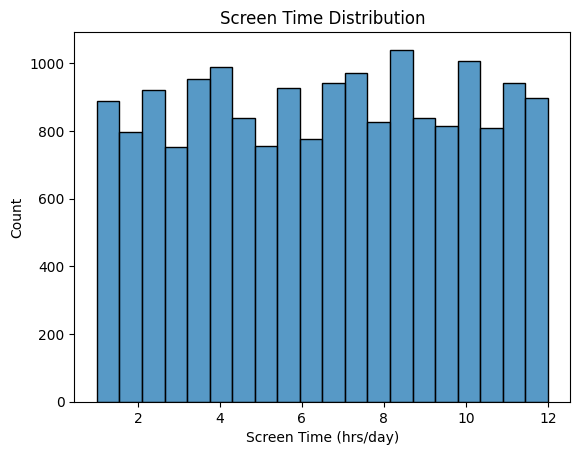

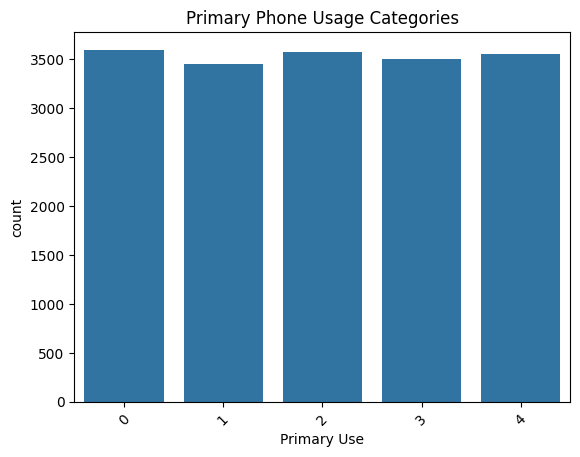

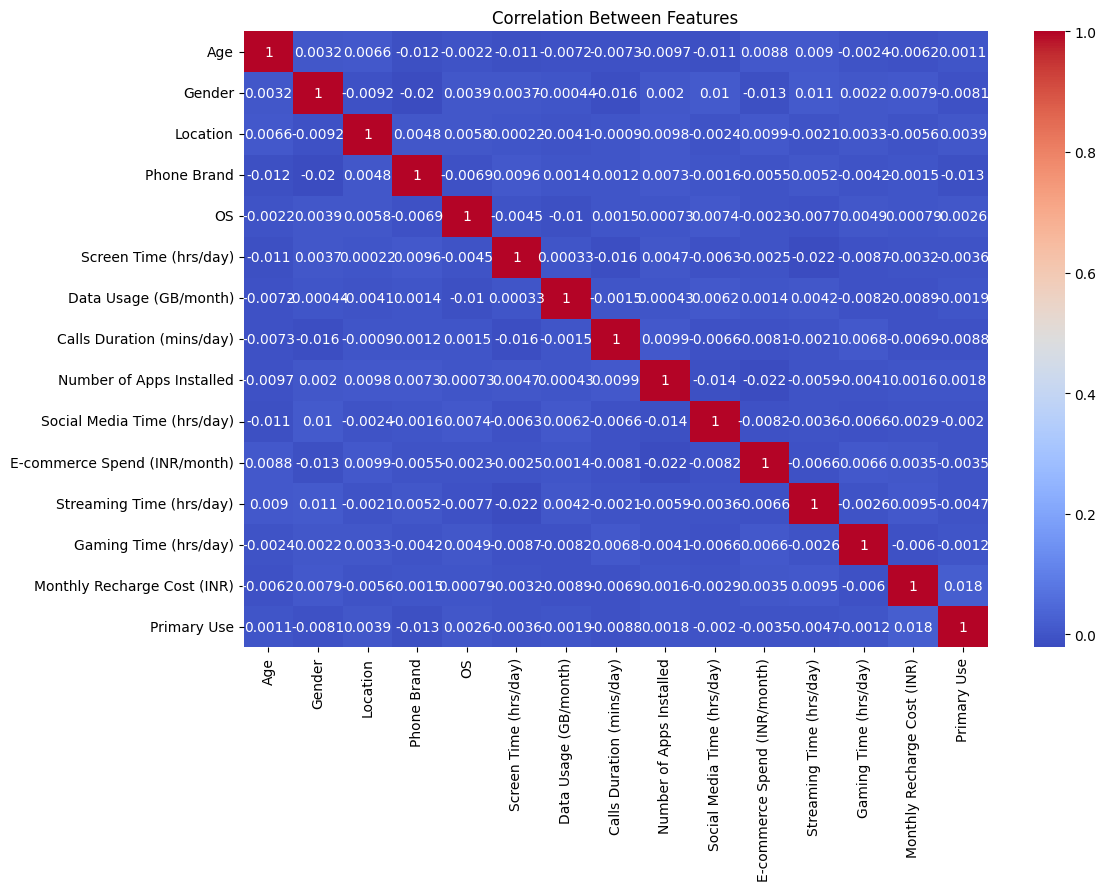

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 

# basic states
print(df.describe())

# Distribution of Screen Time
plt.Figure(figsize=(10,6))
sns.histplot(df['Screen Time (hrs/day)'], bins=20)
plt.title('Screen Time Distribution')
plt.show()

# Barchart of Primary use
plt.Figure(figsize=(10,6))
sns.countplot(x='Primary Use', data=df)
plt.title('Primary Phone Usage Categories')
plt.xticks(rotation=45)
plt.show() 

# Numeric columns select karna
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_cols]

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

# Step 4: Clustering (Unsupervised Learning)

Goal: Distribute the users in groups based on usage pattern 

Tools: Kmeans of sciket-learns

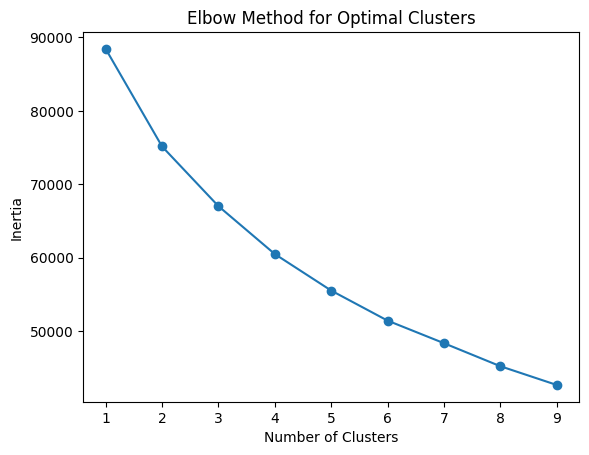

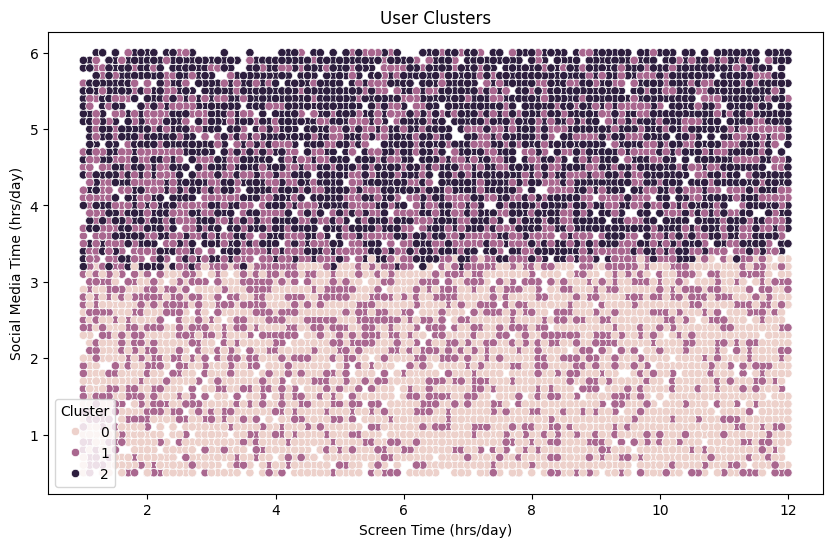

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# To select features
features = ['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Social Media Time (hrs/day)', 
            'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)']
X = df[features]

# To scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# To find the optimal cluster by Elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


# Assume 3 clusters are optimal
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

#  Clusters visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen Time (hrs/day)', y='Social Media Time (hrs/day)', hue='Cluster', data=df)
plt.title('User Clusters')
plt.show()

# Step 5: Multi-class Classification (Supervised Learning)



Goal: To predict Primary Use based on features

Tools: RandomForestClassifier of scikit-learn

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Features aur target
X = df[['Screen Time (hrs/day)', 'Data Usage (GB/month)', 'Calls Duration (mins/day)', 
        'Social Media Time (hrs/day)', 'Streaming Time (hrs/day)', 'Gaming Time (hrs/day)']]
y = df['Primary Use']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model train karna
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions aur accuracy
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.22      0.21       726
           1       0.19      0.18      0.19       697
           2       0.20      0.20      0.20       709
           3       0.19      0.18      0.19       726
           4       0.17      0.17      0.17       680

    accuracy                           0.19      3538
   macro avg       0.19      0.19      0.19      3538
weighted avg       0.19      0.19      0.19      3538



# Step 6: build Streamlit App 



Goal : To create interactive dashboard

Tools : Streamlit